In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotnine as pn
import seaborn as sns 

import utils



In [ ]:
# import importlib
# importlib.reload(utils)


In [4]:
subjs = utils.ExpInfo.getSubjIDs()


# One dot

In [39]:
task = utils.ExpInfo.taskName[0]
df = [utils.LoadData.behaviorData(x, task) for x in subjs]
df = pd.concat(df)
# df['participant'] = df['participant'].str.strip()
# df['accuracy'] = df['accuracy']=='correct'

In [40]:
df_ = df[['group', 'participant', 'actual control', 'angular bias', 'response']]
df_ = df_.groupby(['group', 'participant', 'actual control', 'angular bias']).mean().reset_index()
df_=  df_.sort_values(['group', 'participant']).reset_index()


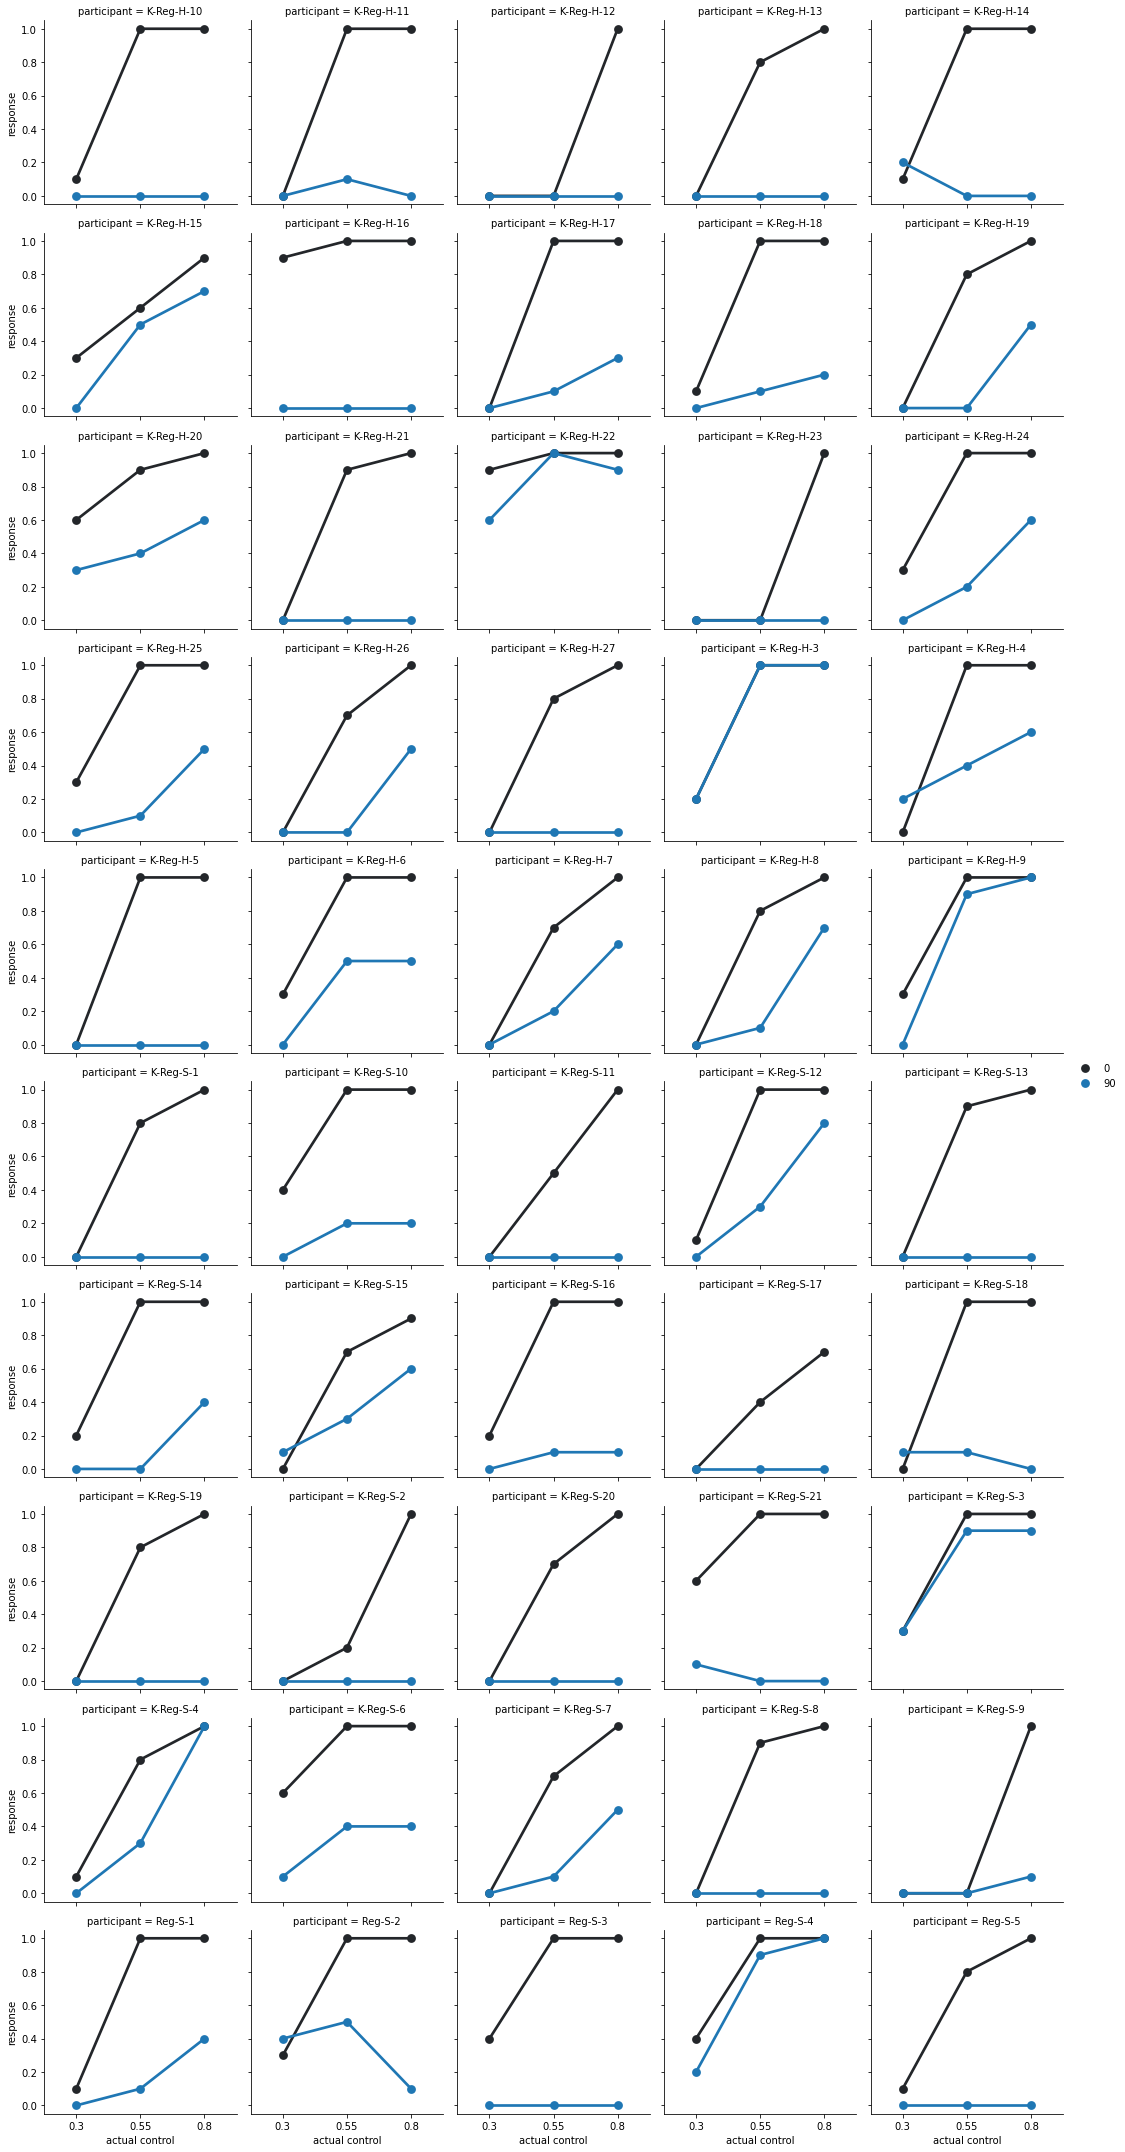

In [28]:
grid = sns.FacetGrid(col='participant', col_wrap=5, data=df_)
grid.map_dataframe(sns.pointplot, 
                   x='actual control', 
                   y='response', 
                   hue='angular bias')
grid.add_legend()

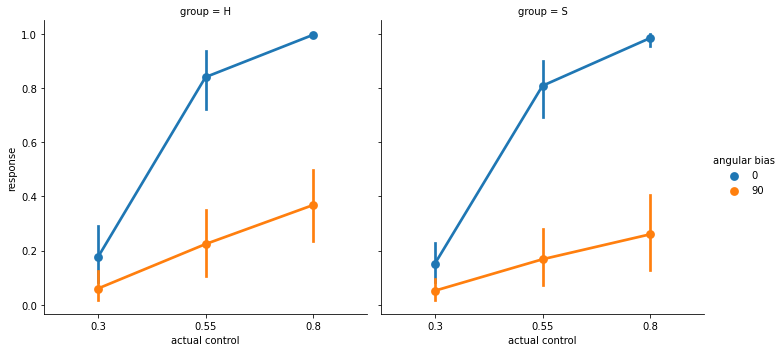

In [42]:
sns.catplot(x='actual control', y='response', hue='angular bias', data=df_, col='group', kind='point')


# three dots

In [46]:
task = utils.ExpInfo.taskName[1]
df = [utils.LoadData.behaviorData(x, task) for x in subjs]
df = pd.concat(df)
df['accuracy'] = df['accuracy']=='correct'

In [49]:
df_ = df[['group','participant', 'actual control', 'angular bias', 'accuracy']]
df_ = df_.groupby(['group','participant', 'actual control', 'angular bias']).mean().reset_index()
# df_.head()

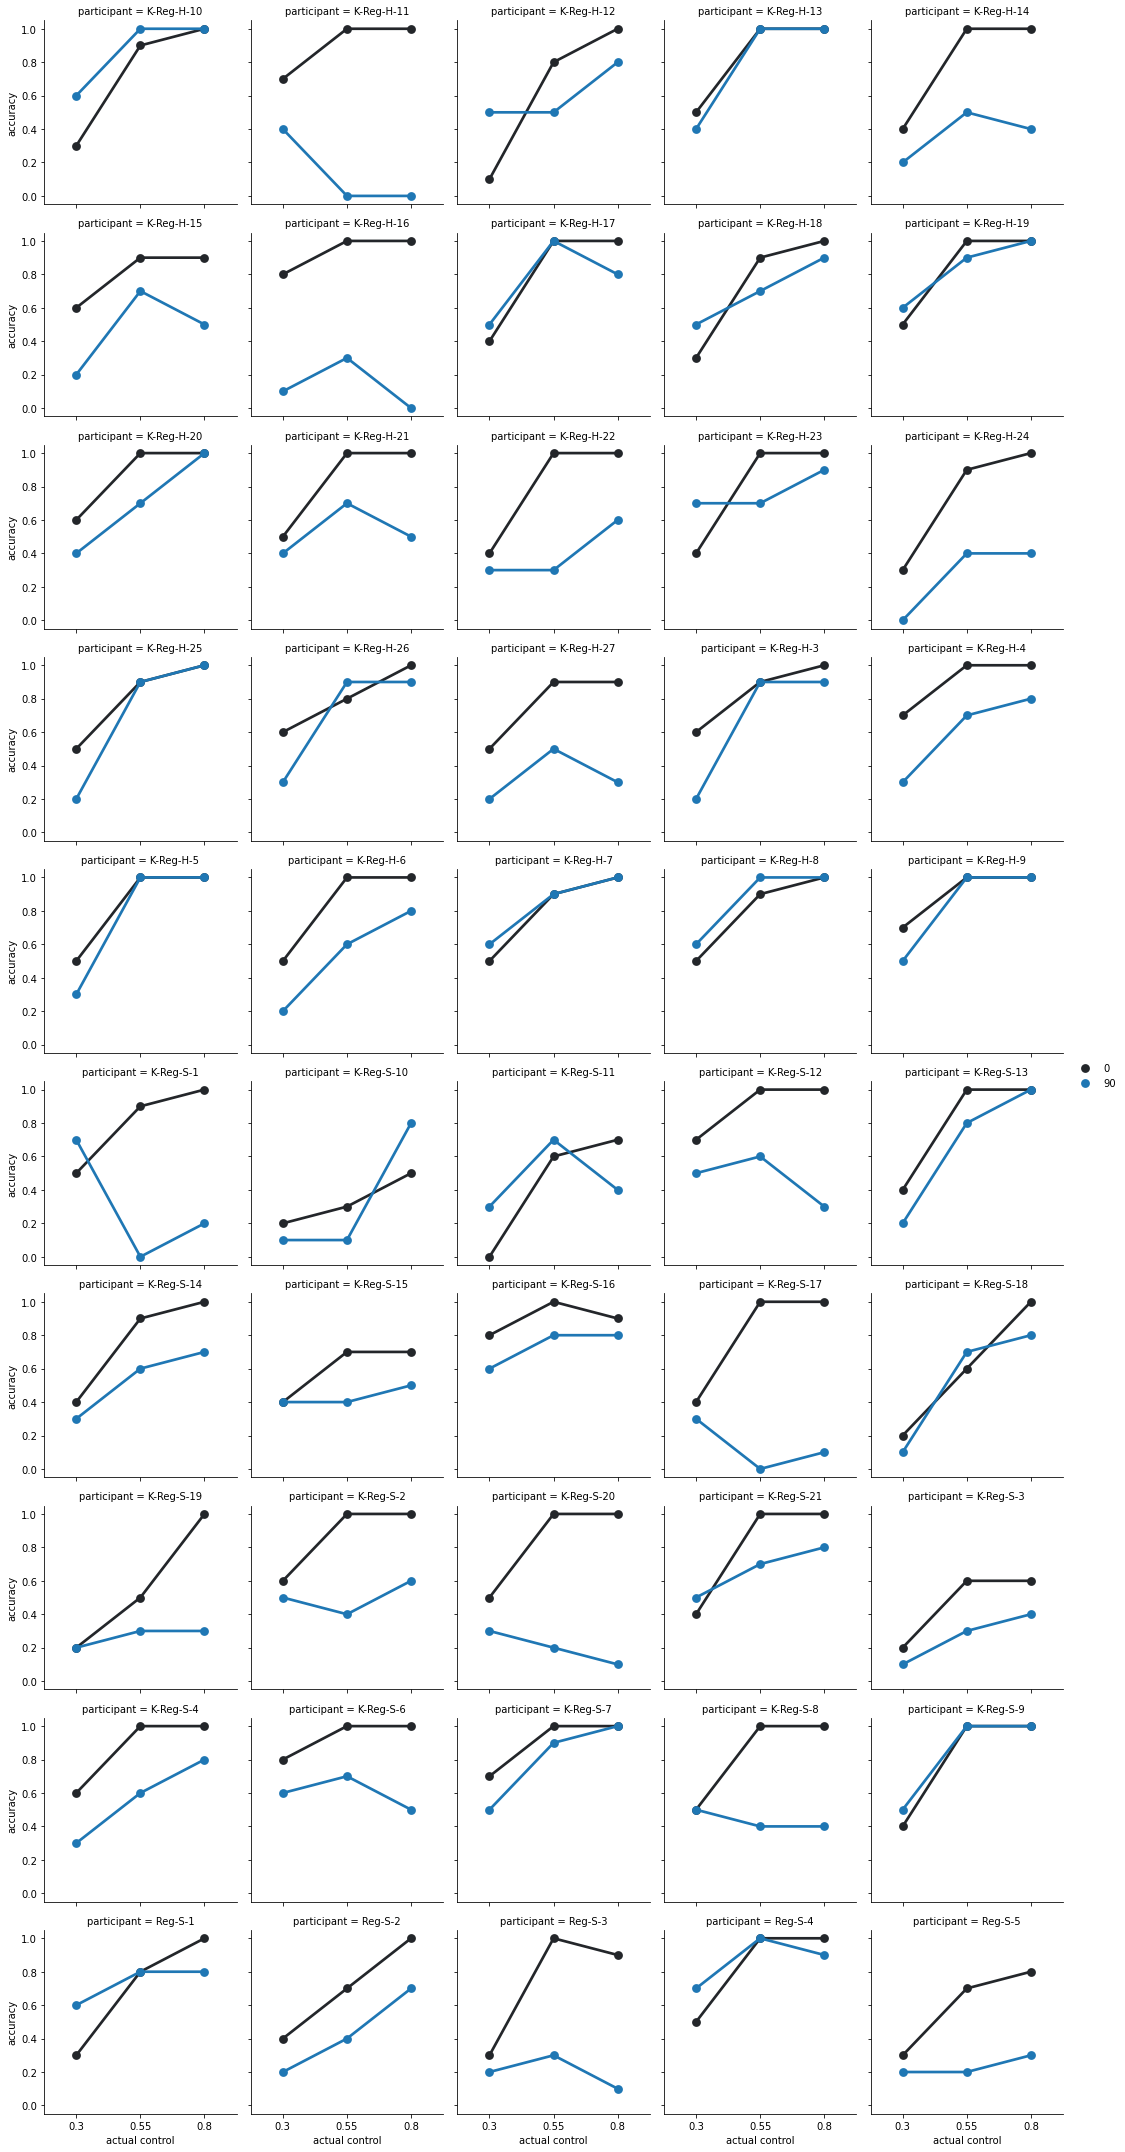

In [50]:
grid = sns.FacetGrid(col='participant', col_wrap=5, data=df_)
grid.map_dataframe(sns.pointplot, 
                   x='actual control', 
                   y='accuracy', 
                   hue='angular bias')
grid.add_legend()

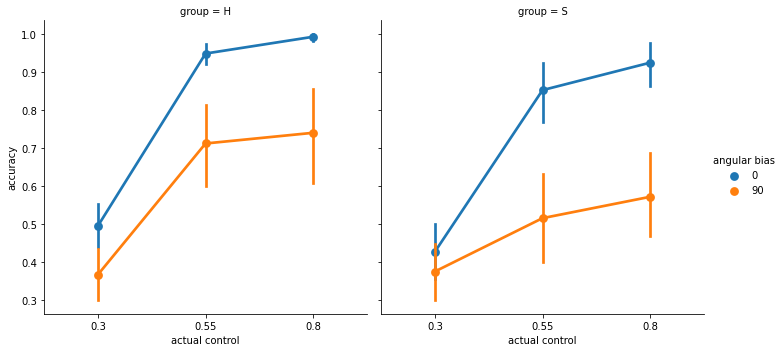

In [51]:
sns.catplot(x='actual control', y='accuracy', hue='angular bias', data=df_, col='group', kind='point')


# Reaching

In [ ]:
task = utils.ExpInfo.taskName[2]
df = [utils.LoadData.behaviorData(x, task) for x in subjs]
df = pd.concat(df)

In [ ]:
df_ = df.copy()
df_ = df_.drop(columns='trial no.')
df_ = df_.groupby(['group', 'participant', 'actual control', 'angular bias']).mean().reset_index()


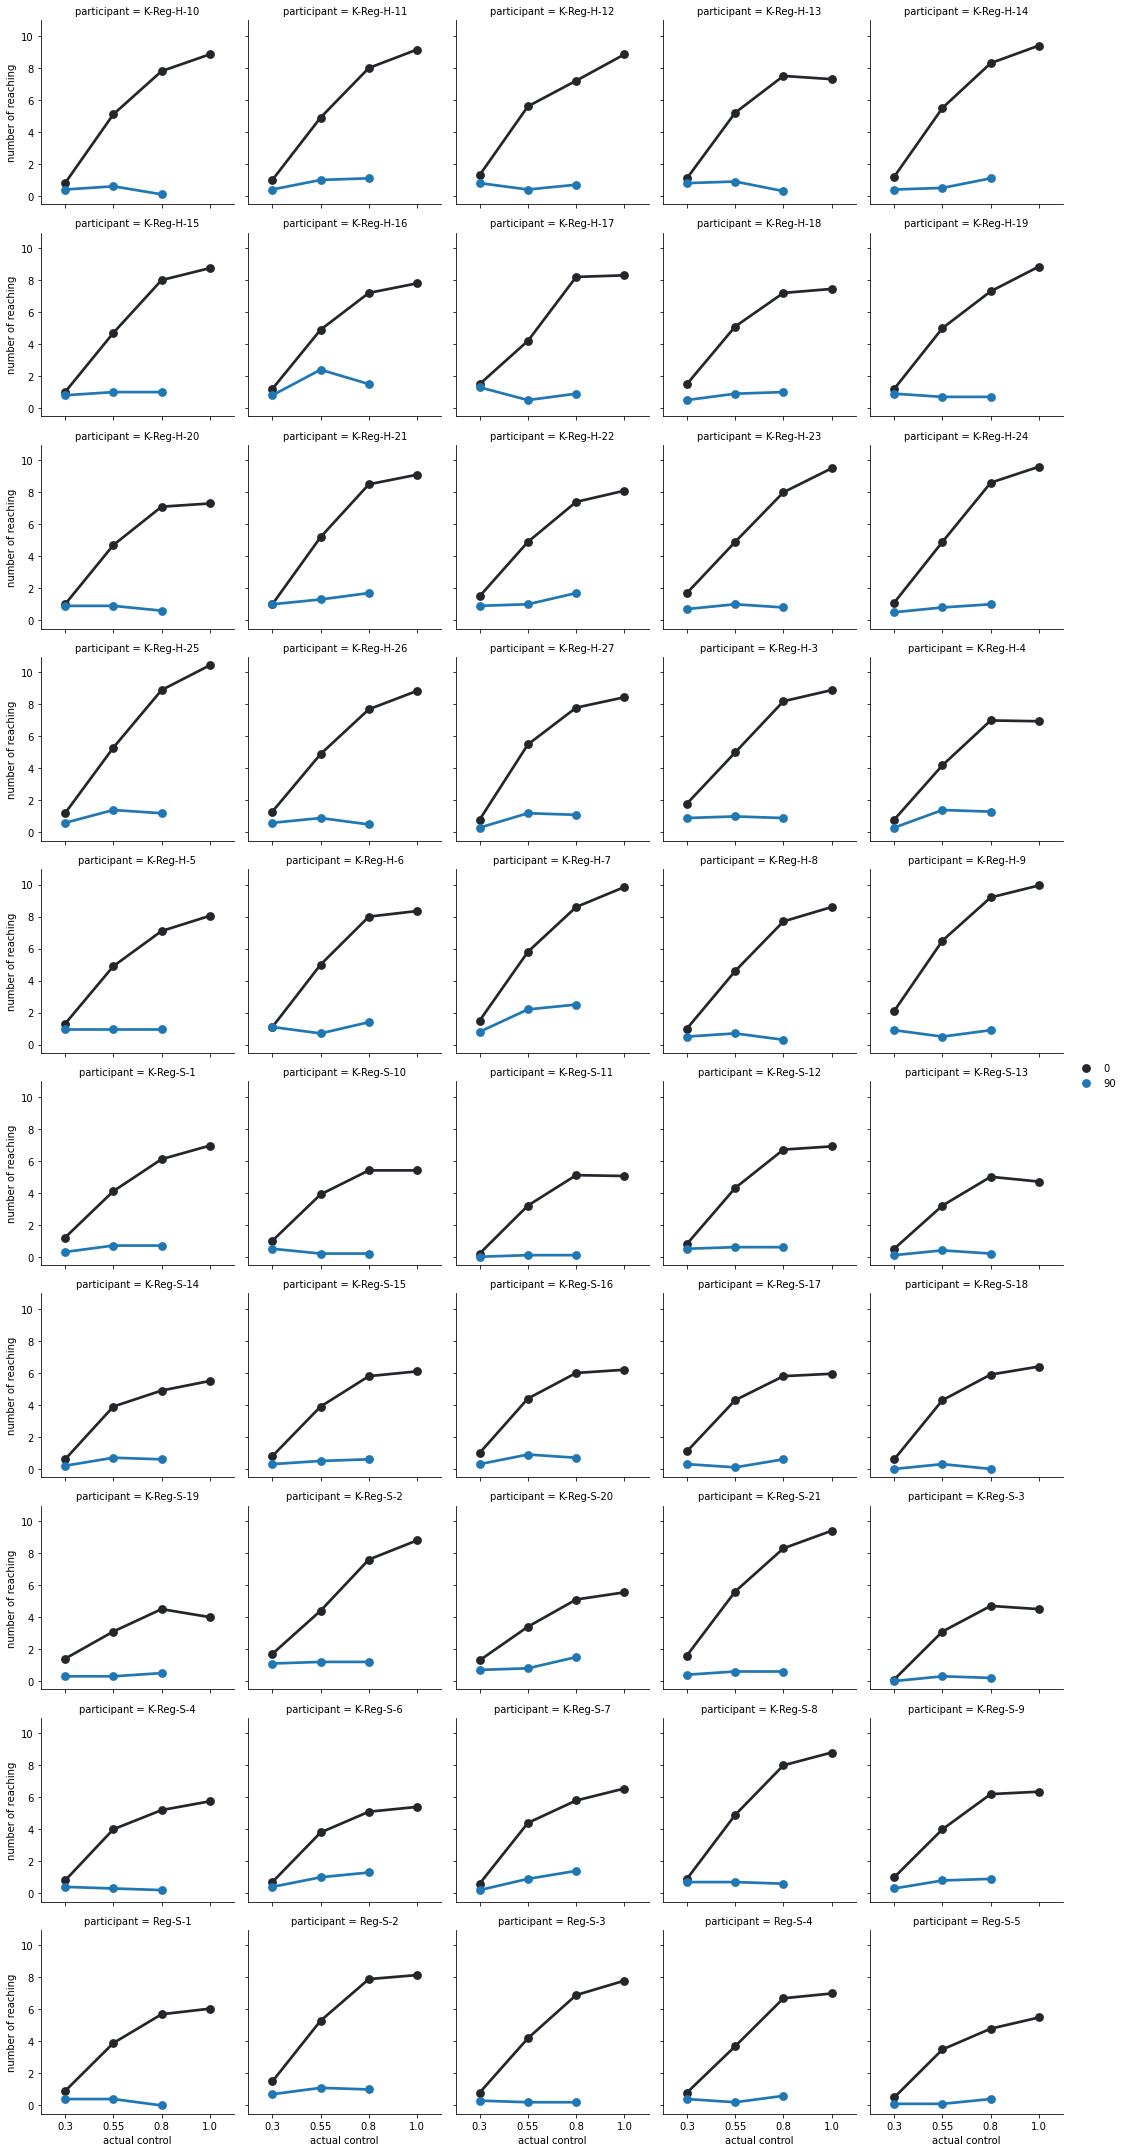

In [13]:
grid = sns.FacetGrid(col='participant', col_wrap=5, data=df_)
grid.map_dataframe(sns.pointplot, 
                   x='actual control', 
                   y='number of reaching', 
                   hue='angular bias')
grid.add_legend()

In [1]:
sns.catplot(x='actual control', y='number of reaching', hue='angular bias', data=df_, col='group', kind='point')


NameError: name 'sns' is not defined